# 2 Probability and Statistics, Linear Regression
1 credit.  Deadline: April 20th, 11:59 pm.


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib.mlab as mlab
import scipy.stats
import statsmodels.formula.api as smf

from sklearn import linear_model as lm

## 1 Monte-Carlo Experiment.  Play with different error-term distributions.

Let's do a Monte-Carlo experiment with linear regression.

### 1.1 Create random data

First create random data (x and eps), and y.  Let $\epsilon \sim N(0,1)$.  You may use distributions like 'np.random.uniform' and 'np.random.normal' for creating $x$.  Specify the model correctly: the disturbance term must be normally distributed, and compute y as a linear function of x and eps.  Pick suitable parameter values ($\beta$-s).

In [2]:
x = np.random.uniform(0, 1, size=(100,1))

eps = np.random.normal(size=(100,1)) * 0.75

y = 5 * x + eps

### 1.2 Visualize your data

Plot y as a function of x.  Repeat the generation and plotting step and change the parameters until the dependency look reasonably clear but still somewhat noisy.


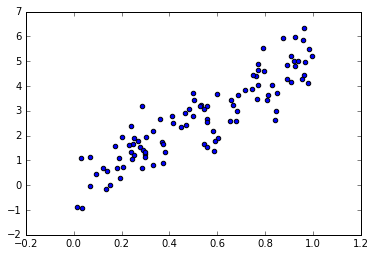

In [3]:
plt.scatter(x,y)

### 1.3 Estimate $\beta$

Estimate $\beta$.  You can use 'sklearn.LinearRegression', 'statmodels.formula.api.ols' (the latter is easier to use), or the OLS formula (consult Greene Ch 3).  Explain your results.  Note: ensure the constant is included!

In [23]:
r = lm.LinearRegression()
f = r.fit(x,y)

f.coef_[0][0]

5.181342247439483

The beta value is a measure of how strongly each predictor variable influences the criterion (dependent) variable. Thus, the value of 5.14 means that a change of one standard deviation in the predictor variable will result in a 5.14 standard deviations in the target variable; the higher beta value the greater the impact of the predictor variable on the target variable. 

Note: both beta components are close to the true values (0 and 5)

## 2 How Precise are your estimates?

### 2.1 Create unrelated $x$, $y$

Create similar random data: $x$, $y$, and $\epsilon$.  However, this time create $y$ in a way that it does not depend on $x$.  Use normal disturbances this time.  Estimate $\beta$.  How big is the $\hat\beta$ component that corresponds to $x$?  Explain!


array([[ 0.69371007]])

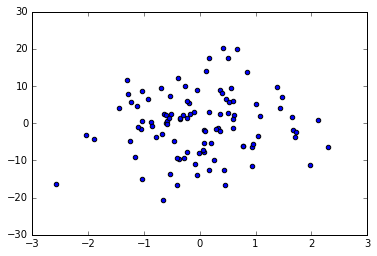

In [5]:
xHat = np.random.normal(0, 1, size=(100,1))

epsHat = np.random.normal(size=(100,1)) * 0.75

yHat = 10 * epsHat

plt.scatter(xHat,yHat)

rHat = lm.LinearRegression()
fHat = rHat.fit(xHat,yHat)

fHat.coef_

### 2.2 Compute the distribution of $\hat\beta$.

Repeat the exercise 1000 times.  Plot the results (for the component
of $\hat\beta$ that corresponds to $x$) on histogram.  use 'plt.hist' to plot histogram.  Calculate mean and standard error of the resulting estimates (you may use 'np.mean' and 'np.var' for that).

In [86]:
fList = []
for i in range(1000):
    xnewHat = np.random.normal(0, 1, size=(100,1))

    epsnewHat = np.random.normal(size=(100,1)) * 0.30

    ynewHat = 0.5 * eps
    
    rnewHat = lm.LinearRegression()
    fnewHat = rHat.fit(xnewHat,ynewHat)

    fList.append(fnewHat.coef_[0][0])

#fList

In [87]:
plt.hist(fList)

(array([   7.,   11.,   71.,  154.,  235.,  238.,  167.,   80.,   32.,    5.]),
 array([-0.12281953, -0.09901616, -0.07521278, -0.05140941, -0.02760603,
        -0.00380266,  0.02000072,  0.0438041 ,  0.06760747,  0.09141085,
         0.11521422]),
 <a list of 10 Patch objects>)

In [88]:
mean = np.mean(fList)
print(mean)

std = np.std(fList)
print(std)

-0.00130933740642
0.0374055512441


### 2.4 How common are large values?

How many time (out of the 1000 simulations) do the estimated $\beta$ exceed 1.96 times it's standard error?  Which number do you expect based on theoretical grounds?

In [92]:
count = 0
for i in (fList):
    if i > 1.96 * (std):
        count +=1

print("Count Exceeding 1.96 s.e.: " + str(count) + " times")

print(str((count/1000)*100) + "%")

Count Exceeding 1.96 s.e.: 25 times
2.5%


About 5% of cases

## 3 Play with other nice distributions.

### 3.1 Repeat the exercise above when violating the assumption that $\epsilon \sim N(0,1)$.

However, pick another "well-behaved" distribution.  Logistic and
uniform distributions are good choices.  Make x-y plot and estimate
beta (remember the constant!)  How often do you get "too large" numbers?  Explain the results.


In [ ]:
loc, scale = 10, 1
xLog = np.random.logistic(loc, scale, 10000)

epsLog = np.random.normal(size=(100,1)) * 0.75

yLog = np.random.normal(size=(100,1)) * 0.75

plt.scatter(xLog, yLog)

rLog = lm.LinearRegression()
fLog = rHat.fit(xHat,yHat)

fLog.coef_

Central Limit Theorem states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population.

### 4. Use a "fat-tailed" distribution

Many distributions in real life do not behave well.  

# 3.1 investigate fat-tailed distributions

Read the file 'terrorism.csv' - number of deaths in terrorist attacks 1968-2006 worldwide (use 'pd.read_csv()').  Calculate the min, mean, and max of deaths, and plot the histogram.  (Note: you may want to specify a large number of bins like 'plt.hist(deaths, 100)' or to use log scale to make the histogram look better).  Comment on your findings.

In [4]:
terrorism = pd.read_csv('terrorism.csv.bz2')

In [ ]:
plt.hist(terrorism['deaths'], 10000)

plt.show()

Now repeat the exercise 3.1 above using power-law distribution.  Use absolut value of 'np.random.standard_cauchy' for this.

In [ ]:
s = absnp.random.standard_cauchy(1000000)

s = s[(s>-25) & (s<25)]  # truncate distribution so it plots well
plt.hist(s, bins=100)
plt.show()